In [1]:
# Dependencies
import json
import requests
import os
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
from oc_key import oc_key
from oc_key import g_key

gmaps.configure(api_key=g_key)


In [2]:
# Load city list csv
city_list_toload = "../Resources/weather_city_final.csv"

city_list_df = pd.read_csv(city_list_toload)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01
...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01


In [3]:
lats = city_list_df["Lat"].tolist()
longs = city_list_df["Lng"].tolist()
#lats, longs
latlongpair = zip(lats,longs)
latlongpair

In [4]:
# NEXT 5 Cells only used while testing my queries to the API - not needed in final

#latitude = 42.331427
#longitude = -83.045754

In [5]:
# Set the url for the Open Charge Map
#query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=500&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latitude}&longitude={longitude}&key={oc_key}"
#query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&verbose=false&compact=true&latitude={latitude}&longitude={longitude}&key={oc_key}"


# Example url from API doc
#url = "https://api.openchargemap.io/v3/poi/?output=json&countrycode=US&maxresults=10&compact=true&verbose=false"

#print(query_url)


In [6]:
#charge_data = requests.get(query_url)
#print(charge_data.status_code)


In [7]:
#charge_json = charge_data.json()

#json.dumps(charge_json[0], indent=2)

In [8]:
#print(len(charge_json))

In [9]:
# list to capture station count per city
station_count = []

# Loop through each city and get a count of how many electric charge stations within 50 miles of center lat/long
for latlongpair in latlongpair:
    query_url = f"https://api.openchargemap.io/v3/poi/?output=json&client=DVProject1&countrycode=US&maxresults=3000&distance=50&distanceunit=miles&verbose=false&compact=true&latitude={latlongpair[0]}&longitude={latlongpair[1]}&key={oc_key}"
    charge_data = requests.get(query_url)
    charge_json = charge_data.json()
    station_count.append(len(charge_json))


In [10]:
station_count

[363,
 45,
 52,
 132,
 1178,
 232,
 235,
 1154,
 41,
 144,
 271,
 1187,
 368,
 393,
 211,
 142,
 126,
 134,
 235,
 103,
 86,
 486,
 180,
 436,
 612,
 6,
 76,
 148,
 615,
 47,
 352,
 25,
 3,
 599,
 384,
 164,
 619,
 660,
 106,
 123,
 527,
 503,
 91,
 847,
 2890,
 55,
 690,
 1627,
 700,
 2966,
 217,
 1936,
 546,
 89,
 570,
 2766,
 1748,
 1925,
 0,
 2840,
 2966,
 474,
 445,
 376,
 1117,
 791,
 143,
 569,
 35,
 33,
 1095,
 67,
 269,
 271,
 270]

In [11]:
# Add station count to the data frame and kick out a CSV
city_list_df["Number of Stations"] = station_count
city_list_df.to_csv('Results/station_count_by_city.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,132
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1178
...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1095
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,271


In [12]:
# Get stations per 1k pop data
pop1k = city_list_df["Population"]/1000

city_list_df["Stations per 1k Population"] = pop1k/station_count
city_list_df.to_csv('Results/station_count_per1kpop.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363,1.326218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45,10.335822
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52,5.400942
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,132,2.358129
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1178,0.222195
...,...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1095,0.561370
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67,5.815642
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269,1.125502
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,271,1.535133


In [13]:
# Get stations per mile using area of 50-mile radius circle, 7,854 miles
permile = city_list_df["Number of Stations"]

city_list_df["Stations per mile"] = (city_list_df["Number of Stations"])/7854
city_list_df.to_csv('Results/station_count_permile.csv', index=False)
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363,1.326218,0.046218
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45,10.335822,0.005730
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52,5.400942,0.006621
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,132,2.358129,0.016807
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1178,0.222195,0.149987
...,...,...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1095,0.561370,0.139419
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67,5.815642,0.008531
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269,1.125502,0.034250
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,271,1.535133,0.034505


In [14]:
city_list_df["Stations per 10 miles"] = (city_list_df["Number of Stations"])/785.4
city_list_df

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile,Stations per 10 miles
0,"Kansas City, Missouri",Kansas City,481417.0,39.099727,-94.578567,66.99,64.00,363,1.326218,0.046218,0.462185
1,"Omaha, Nebraska",Omaha,465112.0,41.256537,-95.934503,66.00,62.60,45,10.335822,0.005730,0.057296
2,"Lincoln, Nebraska",Lincoln,280849.0,40.813616,-96.702596,66.00,62.60,52,5.400942,0.006621,0.066208
3,"St. Louis, Missouri",St. Louis,311273.0,38.627003,-90.199404,63.00,59.00,132,2.358129,0.016807,0.168067
4,"Jersey City, New Jersey",Jersey City,261746.0,40.717754,-74.043143,48.20,44.01,1178,0.222195,0.149987,1.499873
...,...,...,...,...,...,...,...,...,...,...,...
70,"Baltimore, Maryland",Baltimore,614700.0,39.290385,-76.612189,48.99,46.00,1095,0.561370,0.139419,1.394194
71,"New Orleans, Louisiana",New Orleans,389648.0,29.951066,-90.071532,68.00,64.99,67,5.815642,0.008531,0.085307
72,"St. Paul, Minnesota",St. Paul,302760.0,44.953703,-93.089958,55.99,53.01,269,1.125502,0.034250,0.342501
73,"Minneapolis, Minnesota",Minneapolis,416021.0,44.977753,-93.265011,55.99,53.01,271,1.535133,0.034505,0.345047


In [15]:
city_list_df = city_list_df.sort_values("Number of Stations", ascending=False)
city_list_df.to_csv('Results/citylist_sorted_stationct.csv', index=False)
city_list_df.head(20)

,City_State,Clean_City,Population,Lat,Lng,Max Temp,Min Temp,Number of Stations,Stations per 1k Population,Stations per mile,Stations per 10 miles
60,"Los Angeles, California",Los Angeles,3959657.0,34.052234,-118.243685,86.00,71.60,2966,1.335016,0.377642,3.776420
49,"Anaheim, California",Anaheim,349668.0,33.836593,-117.914301,80.01,75.20,2966,0.117892,0.377642,3.776420
44,"Long Beach, California",Long Beach,468883.0,33.770050,-118.193740,75.99,68.00,2890,0.162243,0.367965,3.679654
59,"Santa Ana, California",Santa Ana,333499.0,33.745472,-117.867653,81.00,75.20,2840,0.117429,0.361599,3.615992
55,"Irvine, California",Irvine,265502.0,33.684567,-117.826505,82.00,78.01,2766,0.095988,0.352177,3.521772
51,"Oakland, California",Oakland,421042.0,37.804351,-122.271164,48.99,46.00,1936,0.217480,0.246499,2.464986
57,"San Francisco, California",San Francisco,870044.0,37.774929,-122.419415,70.00,62.60,1925,0.451971,0.245098,2.450980
56,"San Jose, California",San Jose,1026658.0,37.338208,-121.886329,73.99,68.00,1748,0.587333,0.222562,2.225618
47,"Riverside, California",Riverside,323935.0,33.980601,-117.375494,86.00,84.99,1627,0.199100,0.207156,2.071556
11,"New York, New York",New York,8443713.0,40.712775,-74.005973,48.20,44.01,1187,7.113490,0.151133,1.511332


In [24]:
# Set up a heat map for charging stations
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationspermile = city_list_df["Stations per mile"].astype(float)

In [17]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationct, dissipating=False, max_intensity=750, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# Set up a heat map for charging stations per 1k pop
locations = city_list_df[["Lat","Lng"]]
stationct = city_list_df["Number of Stations"].astype(float)
stationper1k = city_list_df["Stations per 1k Population"].astype(float)

In [28]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=stationspermile, dissipating=False, max_intensity=.35, point_radius=2)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

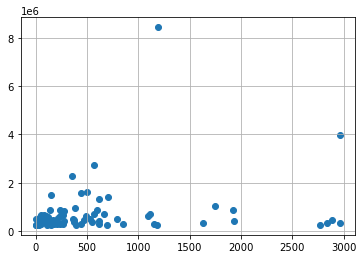

In [29]:
stations = city_list_df["Number of Stations"].tolist()
latitudes = city_list_df["Lat"].tolist()
population = city_list_df["Population"].tolist()
stations_mile = city_list_df["Stations per mile"].tolist()
maxtemp = city_list_df["Max Temp"].tolist()

#Doesn't show much
#plt.scatter(stations, population)
#plt.grid(True)
#plt.show()

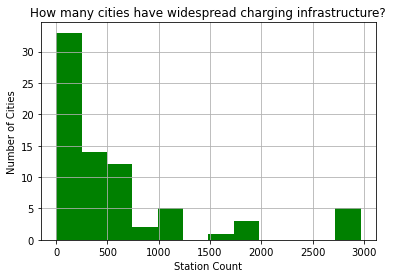

In [35]:
plt.hist(stations, bins=12, color='green')
plt.ylabel("Number of Cities")
plt.xlabel("Station Count")
plt.title("How many cities have widespread charging infrastructure?")
plt.grid(True)
plt.savefig("Results/station_ct_by_cities.png")
plt.show()


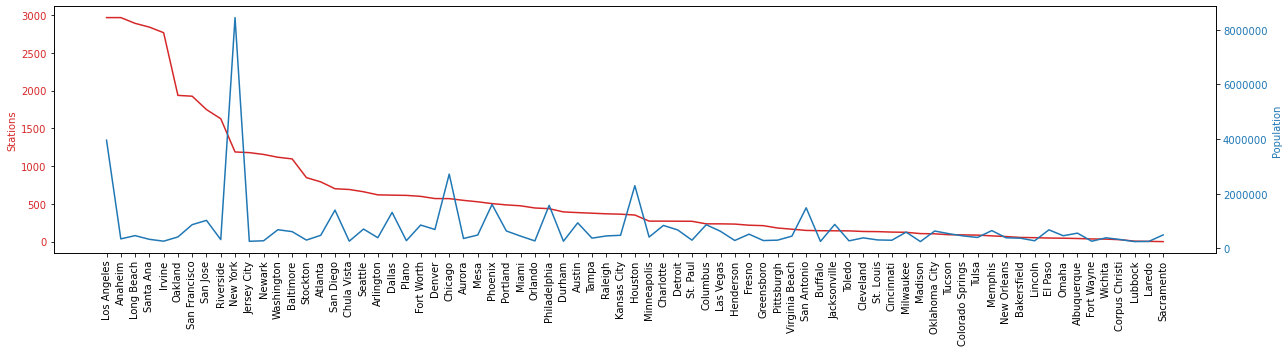

In [36]:
# Generate a figure comparing station count to population
fig, ax1 = plt.subplots(figsize=(18,5))

color = 'tab:red'
#ax1.set_xlabel("City")
ax1.set_ylabel("Stations", color=color)
ax1.plot(city_list_df["Clean_City"], stations, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelrotation=90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Population', color=color)
ax2.plot(city_list_df["Clean_City"], population, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.ticklabel_format(axis='y', style='plain')

fig.tight_layout()
plt.show()

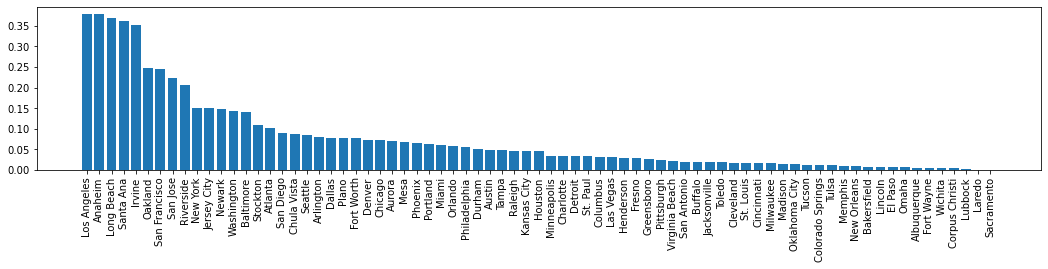

In [37]:
# Stations per mile graphic
plt.figure(figsize=(18,3))
plt.bar(city_list_df["Clean_City"], city_list_df["Stations per mile"])
plt.xticks(rotation="vertical")
plt.savefig("Results/stations_per_mile.png")
plt.show()

In [34]:
station_corr = city_list_df.corr()
station_corr.unstack().sort_values()

Min Temp               Lat                     -0.758202
Lat                    Min Temp                -0.758202
Max Temp               Lat                     -0.753409
Lat                    Max Temp                -0.753409
Lng                    Max Temp                -0.518897
                                                  ...   
Lat                    Lat                      1.000000
Stations per mile      Stations per mile        1.000000
Stations per 10 miles  Stations per 10 miles    1.000000
Number of Stations     Stations per 10 miles    1.000000
Stations per 10 miles  Number of Stations       1.000000
Length: 81, dtype: float64

In [ ]:
# THIS WAS A BAD IDEA - poi.json is WAY too big...


#filepath = os.path.join("Resources", "poi.json")
#with open(filepath, encoding="utf8") as jsonfile:
#    open_charge = json.load(jsonfile)



In [ ]:
# THIS WAS ALL WORKING WITH THE FULL DATA SET BUT THERE'S a CHAR ISSUE SOMEWHERE

#js = [json.loads(line) for line in open(filepath, encoding="utf8")]
#for item in js:
    #name = item.get("name")
    #businessID = item.get("business_id")
    


In [ ]:
#filepath = os.path.join("Resources", "poi.json")

#print(json.dumps(filepath, encoding="utf8", indent=4, sort_keys=True))